In [3]:
%load_ext autoreload
%autoreload 2

pattern = "pattern-6"

entrypoint = pattern
app_cwl_file = f'../cwl-workflow/{pattern}.cwl'

try: 
    from docs.helpers import plot_cwl, wrap_cwl
except (ImportError, ModuleNotFoundError) as e:

    import os
    import sys
    module_path = os.path.abspath(os.path.join('.')) # or the path to your source code
    sys.path.insert(0, module_path)

from helpers import WorkflowViewer, WorkflowWrapper
from cwl_loader import dump_cwl
from pathlib import Path

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
wf = WorkflowViewer.from_file(app_cwl_file, entrypoint)

2025-08-14 20:16:54.943 | INFO     | cwl_loader:load_cwl_from_location:186 - Loading CWL document from ../cwl-workflow/pattern-6.cwl...
2025-08-14 20:16:54.951 | INFO     | cwl_loader:load_cwl_from_yaml:117 - Updating the model to v1.2...
2025-08-14 20:16:54.955 | INFO     | cwl_loader:load_cwl_from_yaml:128 - Raw CWL document successfully updated to v1.2! Now converting to the CWL model...
2025-08-14 20:16:54.958 | INFO     | cwl_loader:load_cwl_from_yaml:136 - Raw CWL document successfully updated to v1.2! Now dereferencing the FQNs...
2025-08-14 20:16:54.958 | INFO     | cwl_loader:_clean_process:62 -   Cleaning Workflow pattern-6...
2025-08-14 20:16:54.959 | INFO     | cwl_loader:_clean_process:62 -   Cleaning CommandLineTool clt...
2025-08-14 20:16:54.959 | INFO     | cwl_loader:load_cwl_from_yaml:144 - CWL document successfully dereferenced!


## Application Package Pattern 6

The CWL includes: 

- one input parameter of type `Directory`
- there are no output parameters of type `Directory`

This scenario takes as input an acquisition, applies an algorithm and generates an output that is not a STAC Catalog

Implementation: derive the NDVI mean taking as input a Landsat-8/9 acquisition

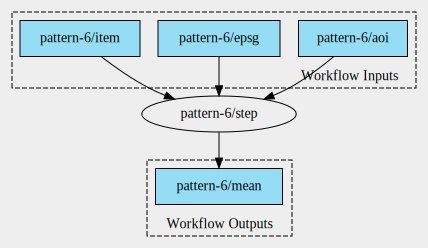

In [5]:
wf.plot()

### Inputs

In [6]:
wf.display_inputs()

| Id | Type | Label | Doc |
| --- | --- | --- | --- |
| `aoi` | `string` | area of interest | area of interest as a bounding box |
| `epsg` | `string` | EPSG code | EPSG code |
| `item` | `Directory` | Landsat-8/9 acquisition reference | Landsat-8/9 acquisition reference |


### Steps

In [7]:
wf.display_steps()

| Id | Runs | Label | Doc |
| --- | --- | --- | --- |
| `step` | `#clt` | None | None |


### Outputs

In [8]:
wf.display_outputs()

| Id | Type | Label | Doc |
| --- | --- | --- | --- |
| `mean` | `float` | Vegetation index mean | Vegetation index mean |


## Data flow management

In [9]:
w = WorkflowWrapper(workflow=wf.workflow, entrypoint=entrypoint)
wrapped = w.wrap()

app_cwl_file = f'.{entrypoint}.cwl'

with open(app_cwl_file, 'w') as f:
    dump_cwl(process=wrapped, stream=f)

2025-08-14 20:16:55.496 | INFO     | cwl_loader:load_cwl_from_location:186 - Loading CWL document from https://raw.githubusercontent.com/eoap/application-package-patterns/refs/heads/main/templates/stage-in.cwl...
2025-08-14 20:16:55.739 | INFO     | cwl_loader:load_cwl_from_yaml:117 - Updating the model to v1.2...
2025-08-14 20:16:55.740 | INFO     | cwl_loader:load_cwl_from_yaml:128 - Raw CWL document successfully updated to v1.2! Now converting to the CWL model...
2025-08-14 20:16:59.088 | INFO     | cwl_loader:load_cwl_from_yaml:136 - Raw CWL document successfully updated to v1.2! Now dereferencing the FQNs...
2025-08-14 20:16:59.088 | INFO     | cwl_loader:_clean_process:62 -   Cleaning CommandLineTool my-asthonishing-stage-in-directory...
2025-08-14 20:16:59.089 | INFO     | cwl_loader:load_cwl_from_yaml:144 - CWL document successfully dereferenced!
2025-08-14 20:16:59.089 | INFO     | cwl_loader:load_cwl_from_location:186 - Loading CWL document from https://raw.githubusercontent.

In [10]:
wf = WorkflowViewer(cwl_file=app_cwl_file, workflow=wrapped, entrypoint="main")

wf.plot()

### Workflow components diagram

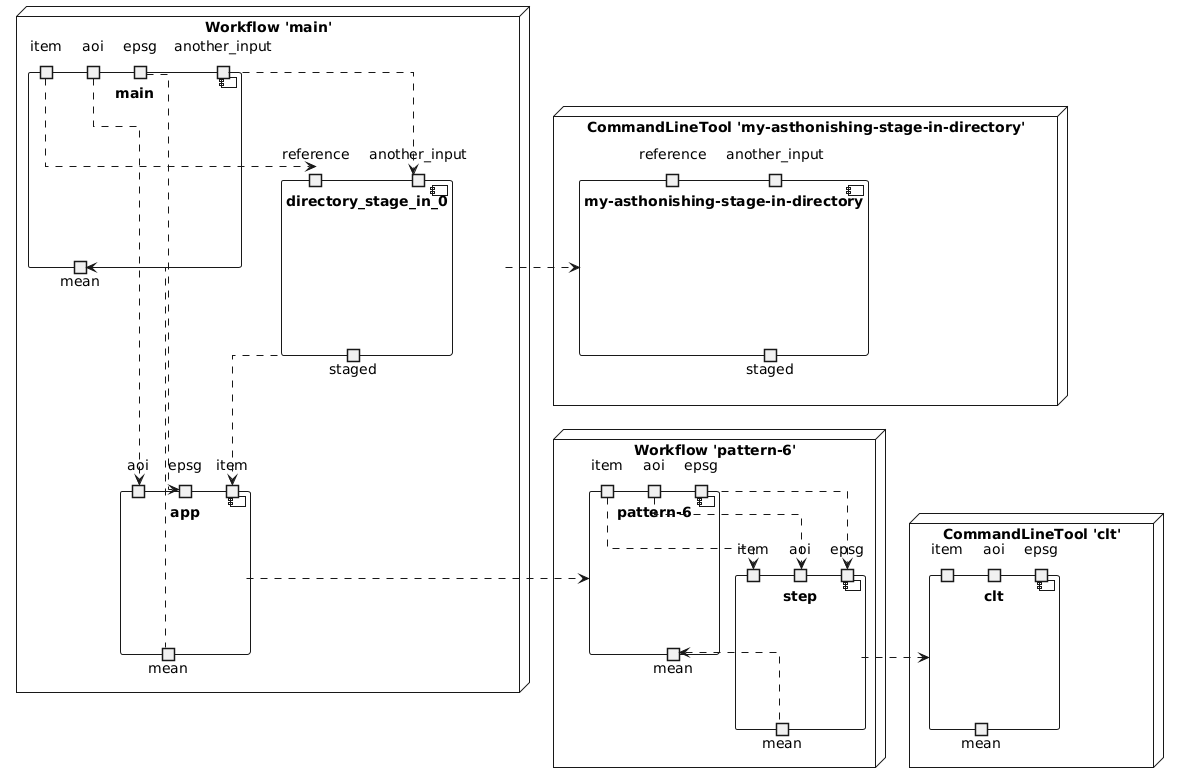

In [11]:
wf.display_components_diagram()

### Inputs

In [12]:
wf.display_inputs()

| Id | Type | Label | Doc |
| --- | --- | --- | --- |
| `aoi` | `string` | area of interest - pattern-6/aoi | area of interest as a bounding box - This parameter is derived from pattern-6/aoi |
| `epsg` | `string` | EPSG code - pattern-6/epsg | EPSG code - This parameter is derived from pattern-6/epsg |
| `another_input` | `string` | Another Input - my-asthonishing-stage-in-directory/another_input | An additional input for demonstration purposes - This parameter is derived from my-asthonishing-stage-in-directory/another_input |
| `item` | `https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml#URI` | Landsat-8/9 acquisition reference - pattern-6/item | Landsat-8/9 acquisition reference - This parameter is derived from pattern-6/item |


### Steps

In [13]:
wf.display_steps()

| Id | Runs | Label | Doc |
| --- | --- | --- | --- |
| `directory_stage_in_0` | `#my-asthonishing-stage-in-directory` | None | None |
| `app` | `#pattern-6` | None | None |


### Outputs

In [14]:
wf.display_outputs()

| Id | Type | Label | Doc |
| --- | --- | --- | --- |
| `mean` | `float` | Vegetation index mean - app/mean | Vegetation index mean - This output is derived from app/mean |
